# Introduction to Supervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 15)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The iris data set we used previously actually consists of data from 3 distinct flower species.

Load the data set again. What are the names of the three species, and how many samples of each are there?

In [35]:

from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Make a pair plot of the iris features colored by their true classification.

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

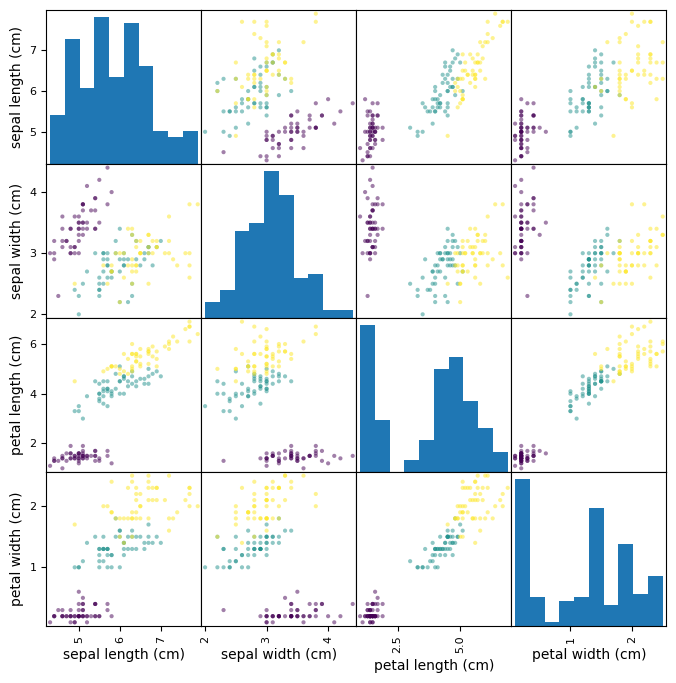

In [36]:
from pandas.plotting import scatter_matrix
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['class'] = iris.target

pd.plotting.scatter_matrix(iris_df.iloc[:,:4], c = iris.target, figsize=(8, 8))

Fit two different $K$ nearest neighbors (KNN) models to the iris data, one with 3 neighbors and one with 10 neighbors. Repeat the pair plot colored by the predicted classifications. How do the results compare to the true classifications?

In this case you're training and testing your model using the same data set. Is that a good idea?

*Hint that isn't essential, but is worth thinking about - should the features be re-scaled in any way?*

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

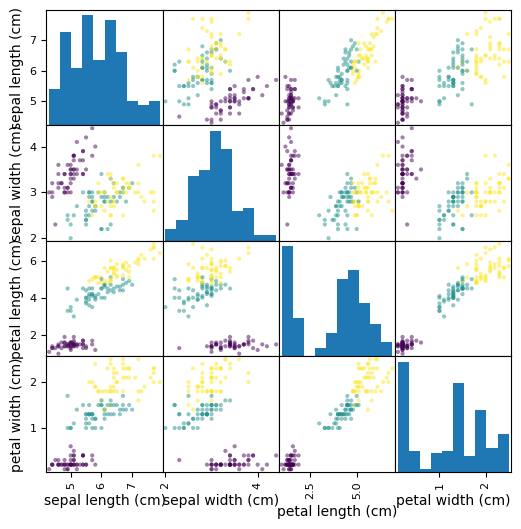

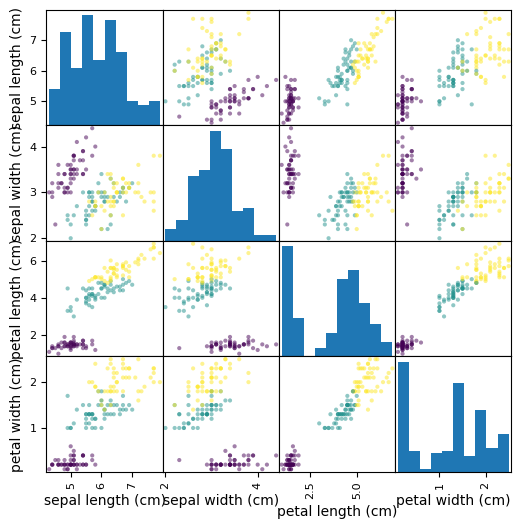

In [30]:
from sklearn.neighbors import KNeighborsClassifier # to classify
from sklearn.preprocessing import StandardScaler


knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(iris_df[iris.feature_names], iris_df['class'])
iris_df['knn3'] = knn3.predict(iris_df[iris.feature_names])

pd.plotting.scatter_matrix(iris_df[iris.feature_names], c=iris_df['knn3'], figsize=(6, 6))


knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(iris_df[iris.feature_names], iris_df['class'])
iris_df['knn10'] = knn10.predict(iris_df[iris.feature_names])

pd.plotting.scatter_matrix(iris_df[iris.feature_names], c=iris_df['knn10'], figsize=(6, 6))




array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

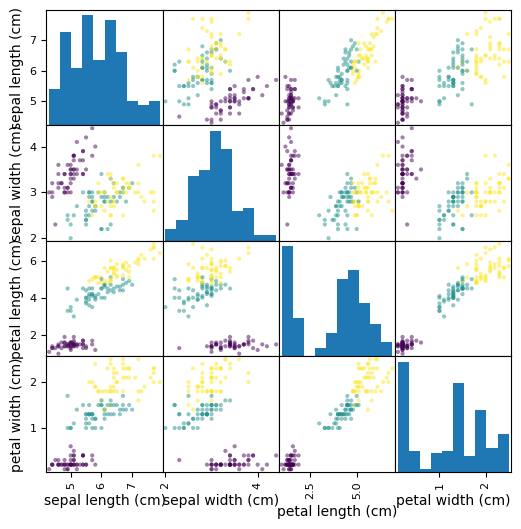

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_df[iris.feature_names])

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(iris_df[iris.feature_names], iris_df['class'])
iris_df['knn3'] = knn3.predict(iris_df[iris.feature_names])

pd.plotting.scatter_matrix(iris_df[iris.feature_names], c=iris_df['knn3'], figsize=(6, 6))


*No, this can cause overfitting problems!*

Produce cross-validation predictions for the iris dataset and a KNN with 5 neighbors. Plot the resulting classifications, as above, and estimate the accuracy of the model as applied to new data. How does this accuracy compare to a KNN with 50 neighbors?

*Hint - read the docs for [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)*

5 accuracy score: 0.9733333333333334
50 accuracy score: 0.9133333333333333


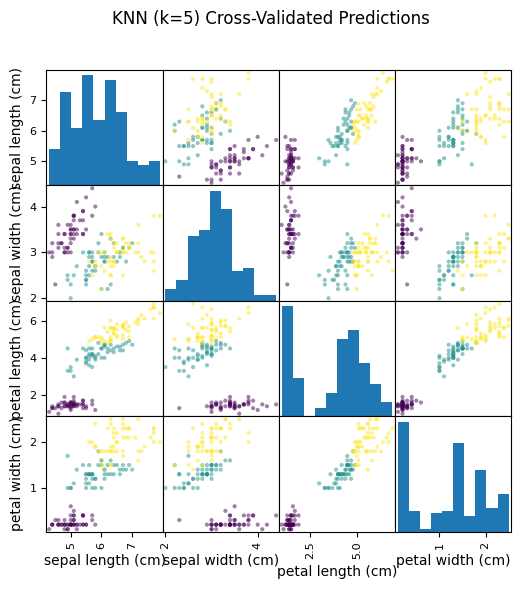

In [37]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

knn5 = KNeighborsClassifier(n_neighbors=5)

#cross_val_predict(estimator, X = {array-like, sparse matrix} of shape (n_samples, n_features) The data to fit,
#                   y = {array-like, sparse matrix} The target variable to try to predict in the case of supervised learning, 
#                   cv=None Determines the cross-validation splitting strategy; None to use the default 5-fold cross validation
#                   int, to specify the number of folds in a (Stratified)KFold)

y = iris.target

knn5 = KNeighborsClassifier(n_neighbors=5)
y_pred_5 = cross_val_predict(knn5, iris.data, y, cv=5)
iris_df['knn5_cv'] = y_pred_5


#accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
acc_scr5 = accuracy_score(y, y_pred_5)
print('5 accuracy score:', acc_scr5)

acc_scr50 = accuracy_score(y, y_pred_50)
print('50 accuracy score:', acc_scr50)

pd.plotting.scatter_matrix(iris_df[iris.feature_names], 
                           c=iris_df['knn5_cv'], figsize=(6, 6))
plt.suptitle("KNN (k=5) Cross-Validated Predictions")
plt.show()


knn50 = KNeighborsClassifier(n_neighbors=50)
y_pred_50 = cross_val_predict(knn50, iris.data, y, cv=5)
iris_df['knn50_cv'] = y_pred_50



#lower accuracy from n_neighbors=50

While it is useful to understand the overall accuracy of the model, it is even more useful to understand the nature of the misclassifications that occur. Calculate the completeness and purity for each class in the iris set, as determined via cross validation for the $K = 50$ model. Do your numbers make sense? Use the plot above to explain.

In [62]:
#target_names gives both index, class_idx, and name

#y is .target, and y_pred is prediction

print('COMPLETENESS')
for class_idx, class_name in enumerate(iris.target_names):
    # completeness = (correctly predicted as class) / (actually that class)
    actual = (y == class_idx)
    correct_predictions = (y_pred_50 == class_idx) & actual
    completeness = correct_predictions.sum() / actual.sum()
    print(f"Class: {class_name}")
    print(f"  Completeness: {completeness:.2f}")

print('PURITY')
for class_idx, class_name in enumerate(iris.target_names):
    # purity = (correctly predicted as class) / (total positive predicted)
    predicted = (y_pred_50 == class_idx)
    correct_predictions = (y == class_idx) & predicted
    if predicted.sum() > 0:
        purity = correct_predictions.sum() / predicted.sum()
    else:
        purity = 0
    print(f"Class: {class_name}")
    print(f"  Purity: {purity:.2f}")

COMPLETENESS
Class: setosa
  Completeness: 1.00
Class: versicolor
  Completeness: 0.94
Class: virginica
  Completeness: 0.80
PURITY
Class: setosa
  Purity: 1.00
Class: versicolor
  Purity: 0.82
Class: virginica
  Purity: 0.93


*Yes, i can better see this with the confusion matrix, but the completeness and purities seem very reasonable for their determined class*

In addition to knowing the completeness and purity for the individual classes, it is also useful to know class predictions for the misclassified sources, or in other words where there is "confusion" for the classifier.

Calculate the confusion matrix for the iris training set and the $K = 50$ model using `sklearn.metrics.confusion_matrix`. Plot three versions of the matrix: (1) the unnormalized matrix, (2) the matrix normalized by rows, and (3) the matrix normalized by columns. Make sure to label your axes and give each plot a title. Which plot(s) is/are most useful, and why?

*Hint - you might find the [`sklearn` confusion matrix tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py) helpful for making a nice plot.*

unnormalized
[[50  0  0]
 [ 0 47  3]
 [ 0 10 40]]


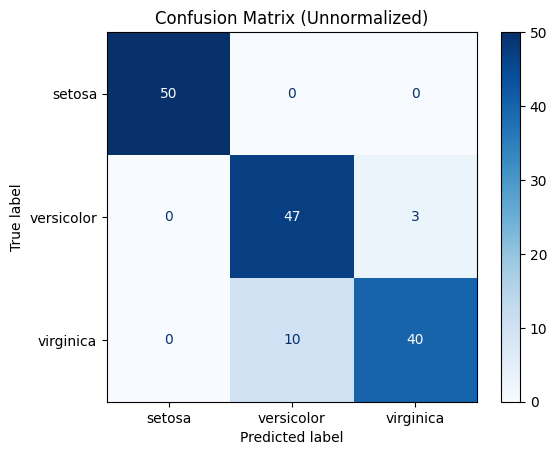

normalized by rows
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.2  0.8 ]]


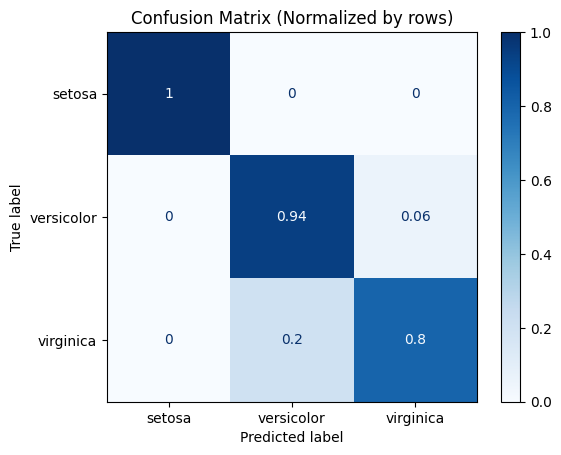

normalized by columns
[[1.         0.         0.        ]
 [0.         0.8245614  0.06976744]
 [0.         0.1754386  0.93023256]]


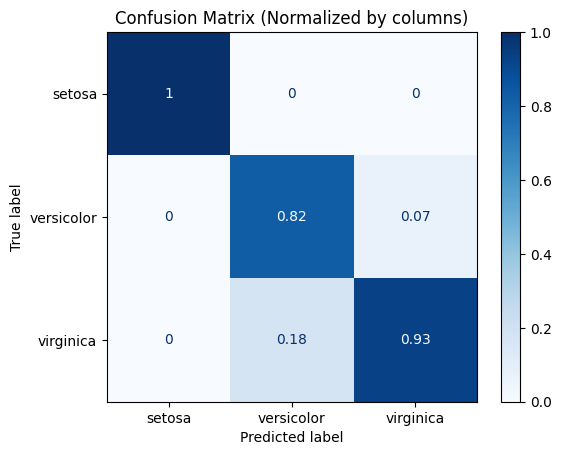

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#confusion_matrix(y_true, y_pred)

y_pred = iris_df['knn50_cv']
cm = confusion_matrix(y, iris_df['knn50_cv'])

print("unnormalized")
print(cm)

labels = iris.target_names
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot(cmap='Blues')
plt.title("Confusion Matrix (Unnormalized)")
plt.show()



cm_row = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print('normalized by rows')
print(cm_row)

display = ConfusionMatrixDisplay(confusion_matrix=cm_row, display_labels=labels)
display.plot(cmap='Blues')
plt.title("Confusion Matrix (Normalized by rows)")
plt.show()

cm_col = cm.astype('float') / cm.sum(axis=0)[np.newaxis, :]

print('normalized by columns')
print(cm_col)

display = ConfusionMatrixDisplay(confusion_matrix=cm_col, display_labels=labels)
display.plot(cmap='Blues')
plt.title("Confusion Matrix (Normalized by columns)")
plt.show()


*The second two plots are the most imoprtant, they visualize the completeness and purity*